#**Importing necessary packages...**

In [ ]:
#Importing all modules.....
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#PreProcessing Data
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,r2_score
from sklearn.metrics import precision_score, recall_score, auc,roc_curve, f1_score,plot_roc_curve
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates

In [ ]:
#Visualisation..........
from sklearn.tree import export_graphviz, export_text
import graphviz
from sklearn import tree 
#Classification...........
#from sklearn.tree import DecisionTreeClassifier, plot_tree,tree
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
#Regression Algos..................
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor 
#Essentials......................
%matplotlib inline
import io
import graphviz

#Code reg google colab .........
'''
from google.colab import files
uploaded = files.upload()
'''



'\nfrom google.colab import files\nuploaded = files.upload()\n'

# **PREPROCESSING DATA**

In [ ]:
#Read Data......
#data = pd.read_csv(io.BytesIO(uploaded ["detect_data_set.csv"]))
data = pd.read_csv("detect_data_set.csv")

In [ ]:
data.head(5)

,Fault,Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050


In [ ]:
#Cleaning Data
X = data.drop(columns=["Fault"]) 
y = data["Fault"] 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)
#......................

In [ ]:
#DATA SCALING........
scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)

In [ ]:
#data[1000:2000]

In [ ]:
#data.describe()
#data.dtypes.to_frame()

In [ ]:
'''
data.info()
data.shape
data.isnull().sum().to_frame()
data["Fault"].value_counts()
'''

'\ndata.info()\ndata.shape\ndata.isnull().sum().to_frame()\ndata["Fault"].value_counts()\n'

#**(1)Decision Tree Classifier**

Decision Tree Classification Report........
Precision : 0.9973 
Accuracy : 0.9967 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1293
           1       1.00      1.00      1.00      1108

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401

**********************************************************************
Confusion Matrix.........
[[1290    3]
 [   5 1103]]


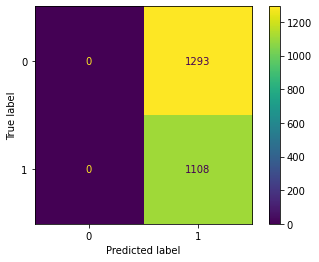

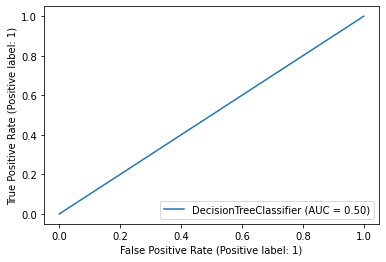

In [ ]:
#Decision Tree Classifier

DTC = tree.DecisionTreeClassifier(criterion="gini", random_state = 0)
DTC.fit(X_train_scaled,y_train)
DTC_predictions = DTC.predict(X_test_scaled)

DTC_score = accuracy_score(y_test,DTC_predictions)
DTC_precision = precision_score(y_test,DTC_predictions)

#Report Generation..........
print("Decision Tree Classification Report........")
print("Precision : {} \nAccuracy : {} \n".format(round(DTC_precision,4),round(DTC_score,4)))
print(classification_report(y_test , DTC_predictions))
print("*"*70)
print("Confusion Matrix.........")
print(confusion_matrix(y_test , DTC_predictions))
metrics.plot_confusion_matrix(DTC,X_test,y_test,include_values= True )
plt.show()   
metrics.plot_roc_curve(DTC,X_test,y_test,)
plt.show() 


#**Visualising Decison Tree**

In [ ]:
#Text.............................
r = export_text(DTC)
print(r)

|--- feature_1 <= -0.11
|   |--- feature_4 <= -1.40
|   |   |--- feature_0 <= 0.19
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.19
|   |   |   |--- class: 1
|   |--- feature_4 >  -1.40
|   |   |--- feature_5 <= -1.51
|   |   |   |--- feature_1 <= -0.17
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  -0.17
|   |   |   |   |--- class: 0
|   |   |--- feature_5 >  -1.51
|   |   |   |--- feature_5 <= 1.52
|   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  1.52
|   |   |   |   |--- feature_5 <= 1.52
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  1.52
|   |   |   |   |   |--- class: 1
|--- feature_1 >  -0.11
|   |--- feature_1 <= 0.36
|   |   |--- feature_0 <= 0.17
|   |   |   |--- feature_0 <= -0.25
|   |   |   |   |--- feature_4 <= -1.57
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  -1.57
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  -0.25
|   |   |   |   |--- feature_2 <= -0.40
|   |   |   |   |   |-

In [ ]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

     |████████████████████████████████| 61 kB 476 kB/s 


In [ ]:
viz = dtreeviz(DTC,X_train,
               y_train,
               target_name='Fault', 
               feature_names = ["Ia","Ib","Ic","Va","Vb","Vc" ],
               class_names =["No Fault","Fault"] ,
               scale = 2,
               title ="Transmission Line Faults",
               title_fontsize=18,
               colors = {"title":"red"}
               )
viz


In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7))
plot_tree(DTC,filled=True,feature_names=['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'])
plt.show()

#**(2)RandomForestClassifier**

Random Forest Classification Report........
Precision : 0.9946 
Accuracy : 0.9938 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1286
           1       0.99      0.99      0.99      1115

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401

**********************************************************************
Confusion Matrix.........
[[1280    6]
 [   9 1106]]


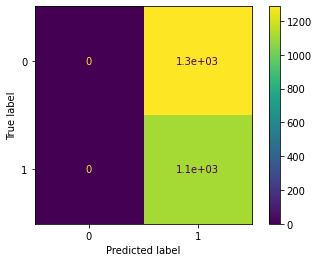

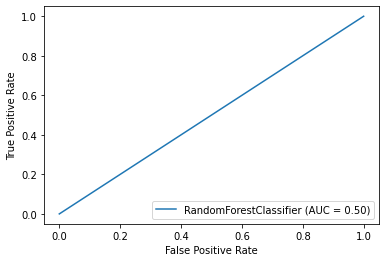

In [ ]:

RFC = RandomForestClassifier(n_estimators=1)
RFC.fit(X_train_scaled,y_train)
RFC_predictions = RFC.predict(X_test_scaled)


RFC_score = accuracy_score(y_test,RFC_predictions)
RFC_precision = precision_score(y_test,RFC_predictions)

#Report Generation..........
print("Random Forest Classification Report........")
print("Precision : {} \nAccuracy : {} \n".format(round(RFC_precision,4),round(RFC_score,4)))
print(classification_report(y_test , RFC_predictions))
print("*"*70)
print("Confusion Matrix.........")
print(confusion_matrix(y_test , RFC_predictions)) 
metrics.plot_confusion_matrix(RFC,X_test,y_test)
plt.show()   
metrics.plot_roc_curve(RFC,X_test,y_test)
plt.show() 


In [ ]:
#visualize_classifier(RFC, X, y)


#**(3)Support Vector Machine Classifier**

Support Vector Machine Report........
Precision : 1.0 
Accuracy : 0.9817 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1286
           1       1.00      0.96      0.98      1115

    accuracy                           0.98      2401
   macro avg       0.98      0.98      0.98      2401
weighted avg       0.98      0.98      0.98      2401

**********************************************************************
Confusion Matrix.........
[[1286    0]
 [  44 1071]]


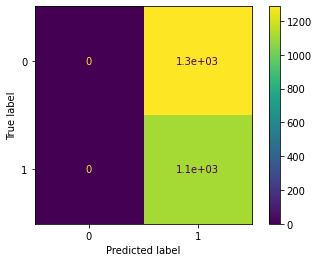

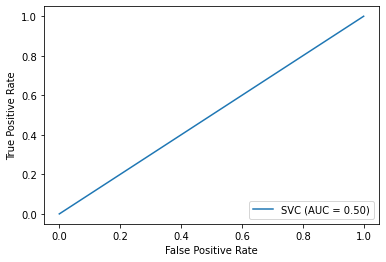

In [ ]:
#Support Vector Machine......

SVM = svm.SVC()
SVM.fit(X_train_scaled,y_train)
SVM_predictions = SVM.predict(X_test_scaled)

SVM_score = accuracy_score(y_test,SVM_predictions)
SVM_precision = precision_score(y_test,SVM_predictions)

#Report Generation..........
print("Support Vector Machine Report........")
print("Precision : {} \nAccuracy : {} \n".format(round(SVM_precision,4),round(SVM_score,4)))
print(classification_report(y_test , SVM_predictions))
print("*"*70)
print("Confusion Matrix.........")
print(confusion_matrix(y_test , SVM_predictions)) 
metrics.plot_confusion_matrix(SVM,X_test,y_test)
plt.show()   
metrics.plot_roc_curve(SVM,X_test,y_test)
plt.show() 

#**(4)MLP CLASSIFIER**

MLP NEURAL NETWORK Classification Report........
Precision : 1.0 
Accuracy : 0.9738 

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1286
           1       1.00      0.94      0.97      1115

    accuracy                           0.97      2401
   macro avg       0.98      0.97      0.97      2401
weighted avg       0.97      0.97      0.97      2401

**********************************************************************
Confusion Matrix.........
[[1286    0]
 [  63 1052]]


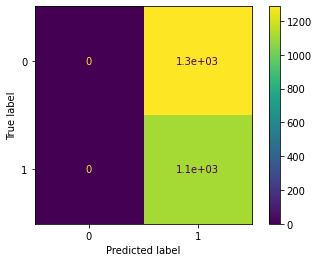

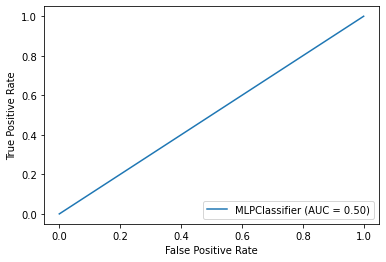

In [ ]:

MLP = MLPClassifier(alpha=1, max_iter=1000)
MLP.fit(X_train_scaled,y_train)
MLP_predictions = MLP.predict(X_test_scaled)


MLP_score = accuracy_score(y_test,MLP_predictions)
MLP_precision = precision_score(y_test,MLP_predictions)

#Report Generation..........
print("MLP NEURAL NETWORK Classification Report........")
print("Precision : {} \nAccuracy : {} \n".format(round(MLP_precision,4),round(MLP_score,4)))
print(classification_report(y_test , MLP_predictions))
print("*"*70)
print("Confusion Matrix.........")
print(confusion_matrix(y_test , MLP_predictions)) 
metrics.plot_confusion_matrix(MLP,X_test,y_test)
plt.show()   
metrics.plot_roc_curve(MLP,X_test,y_test)
plt.show() 

#**(5)KN NEIGHBOURS CLASSIFIER**

KNN Classification Report........
Precision : 0.9955 
Accuracy : 0.9958 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1286
           1       1.00      1.00      1.00      1115

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401

**********************************************************************
Confusion Matrix.........
[[1281    5]
 [   5 1110]]


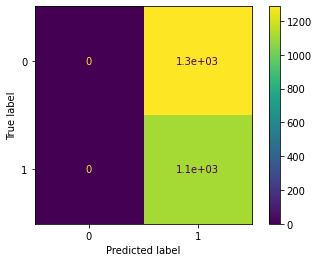

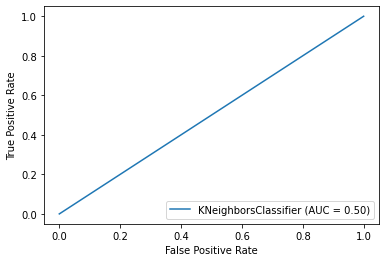

In [ ]:

KNN = KNeighborsClassifier(3)
KNN.fit(X_train_scaled,y_train)
KNN_predictions = KNN.predict(X_test_scaled)


KNN_score = accuracy_score(y_test,KNN_predictions)
KNN_precision = precision_score(y_test,KNN_predictions)

#Report Generation..........
print("KNN Classification Report........")
print("Precision : {} \nAccuracy : {} \n".format(round(KNN_precision,4),round(KNN_score,4)))
print(classification_report(y_test , KNN_predictions))
print("*"*70)
print("Confusion Matrix.........")
print(confusion_matrix(y_test , KNN_predictions))
metrics.plot_confusion_matrix(KNN,X_test,y_test)
plt.show()   
metrics.plot_roc_curve(KNN,X_test,y_test)
plt.show()  

#**Training , Analysing and Comparing various ML algorithms**

In [ ]:
#Training all at once ...................
model_names = ["DecisonTeeClassifier","RandomForest","SVM Classifier","MLP","KNN"]
models = [
          DecisionTreeClassifier(max_depth=5),
          RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
          svm.SVC(gamma=2),
          MLPClassifier(alpha=1, max_iter=1000),
          KNeighborsClassifier(3)        
]
model_cols = []
analyse=pd.DataFrame(columns=model_cols)
index=0

for name, clf in zip(model_names, models):
    clf.fit(X_train_scaled,y_train)
    analyse.loc[index,'Classifiers'] = name
    analyse.loc[index,'Train Accuracy'] = clf.score(X_train_scaled,y_train)
    analyse.loc[index,'Test Accuracy'] = clf.score(X_test_scaled,y_test)
    analyse.loc[index,'Precision'] = precision_score(y_test,clf.predict(X_test_scaled))
    analyse.loc[index,'Recall'] = recall_score(y_test,clf.predict(X_test_scaled))
    analyse.loc[index,'F1 Score'] = f1_score(y_test,clf.predict(X_test_scaled))
    index+=1

In [ ]:
analyse 

,Classifiers,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,DecisonTeeClassifier,0.991146,0.990004,0.999085,0.979372,0.989130
1,RandomForest,0.978229,0.972928,0.993421,0.947982,0.970170
2,SVM Classifier,0.995417,0.995835,0.998197,0.992825,0.995504
3,MLP,0.975625,0.974594,1.000000,0.945291,0.971876
4,KNN,0.997917,0.995835,0.995516,0.995516,0.995516


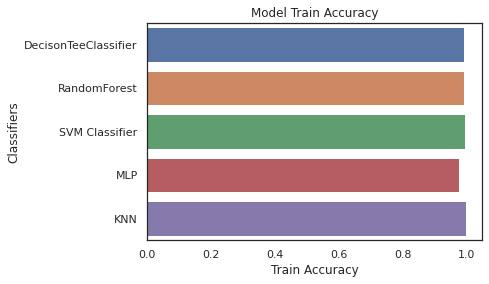

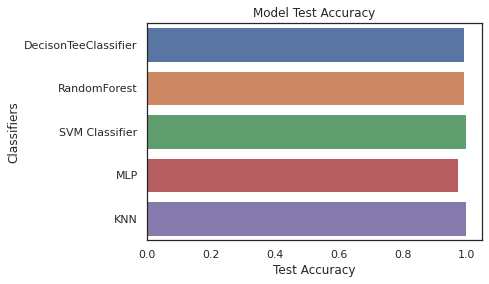

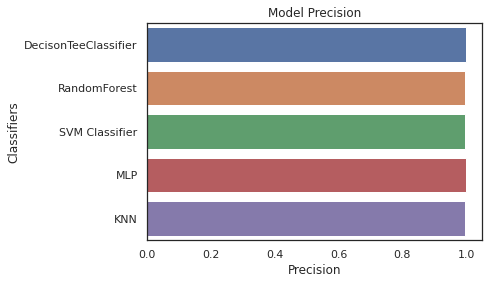

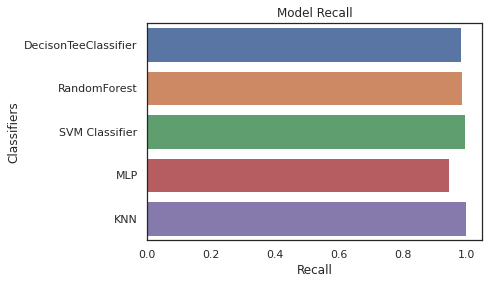

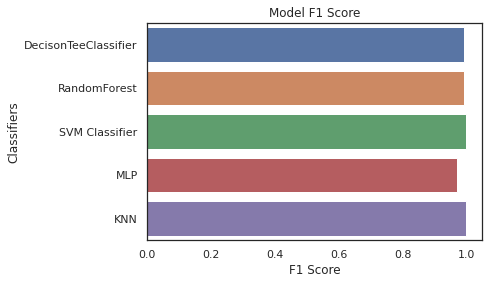

In [ ]:
#Plotting graphically.................
sns.set(style = "white")
for i in range(1,6) :
  sns.barplot( y = analyse["Classifiers"],x = analyse[analyse.columns[i]])
  plt.title("Model " + analyse.columns[i])
  plt.show()


In [ ]:
colors = ["red","blue","green","yellow","violet"]
k = 0
for mod  in ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall',
       'F1 Score'] : 
  plt.figure(figsize=(10,10))
  sns.lineplot(x= analyse['Classifiers'],
                  y = analyse[mod],
                color = colors[k]
                  )
  k+=1
  plt.show()


In [ ]:
analytics =['Max_Train Accuracy', 'Max_Test Accuracy', 'Max_Precision', 'Max_Recall',
       'Max_F1 Score']
max_vals =[]
j = 0
for i in range(1,6):
  max_vals.append(max(analyse[analyse.columns[i]]))
  j+=1

for i in range(5):
  print(analytics[i] ,"is ", max_vals[i])


Max_Train Accuracy is  0.9979166666666667
Max_Test Accuracy is  0.9958350687213661
Max_Precision is  1.0
Max_Recall is  0.9955156950672646
Max_F1 Score is  0.9955156950672646


#**Plotting.......**

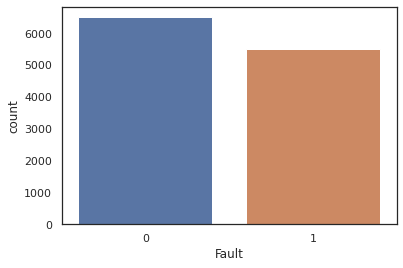

In [ ]:
#Plotting
#Count PLot
sns.set(style = "white", color_codes=" True")
sns.countplot(data["Fault"])
plt.show()


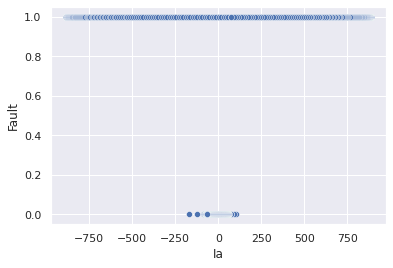

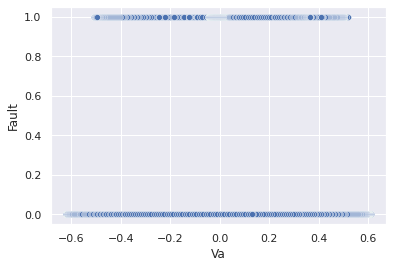

'\nsns.scatterplot(x =data["Vb"], y = data["Fault"])\nplt.show()\nsns.scatterplot(x =data["Vc"], y = data["Fault"])\nplt.show()\n'

In [ ]:
sns.set(style = "darkgrid")
sns.scatterplot(x =data["Ia"], y = data["Fault"])
plt.show()
'''
sns.scatterplot(x =data["Ib"], y = data["Fault"])
plt.show()
sns.scatterplot(x =data["Ic"], y = data["Fault"])
plt.show()
'''
sns.scatterplot(x =data["Va"], y = data["Fault"])
plt.show()
'''
sns.scatterplot(x =data["Vb"], y = data["Fault"])
plt.show()
sns.scatterplot(x =data["Vc"], y = data["Fault"])
plt.show()
'''


In [ ]:

fig = px.line(data, x = "Ia", y = "Va", title="For Line A", color = "Fault")
fig.show()

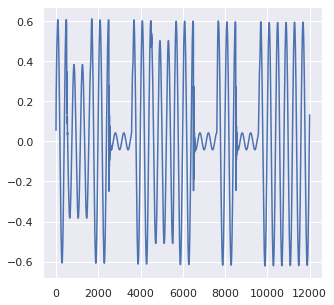

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(data['Va'])
plt.show()

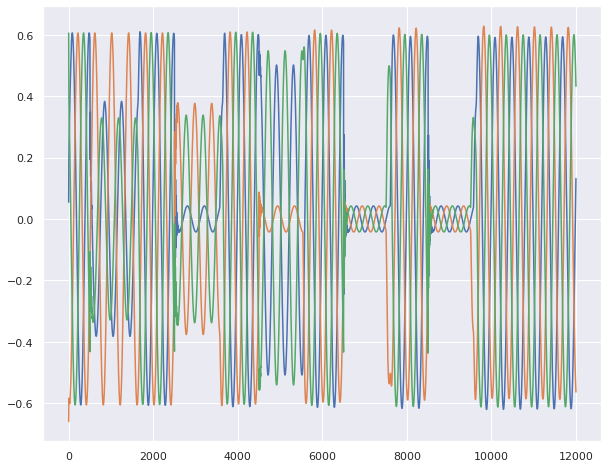

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(data["Va"])
plt.plot(data["Vb"])
plt.plot(data["Vc"])

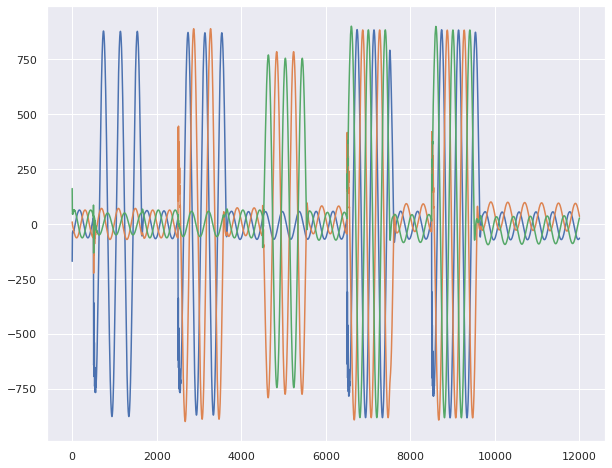

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(data["Ia"])
plt.plot(data["Ib"])
plt.plot(data["Ic"])

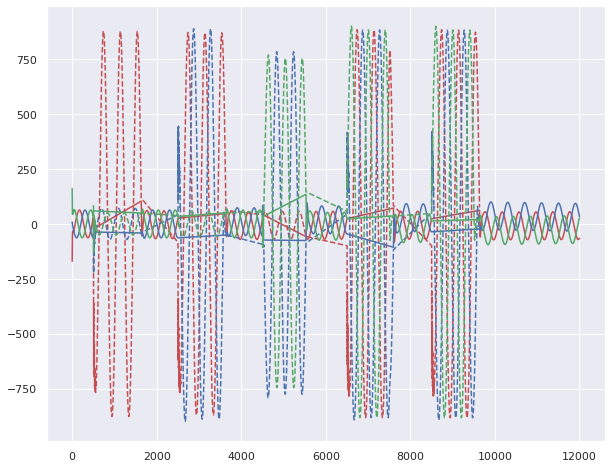

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(data[data['Fault'] == 0]["Ia"],'r')
plt.plot(data[data['Fault'] == 1]["Ia"],'r--')
plt.plot(data[data['Fault'] == 0]["Ib"],'b')
plt.plot(data[data['Fault'] == 1]["Ib"],'b--')
plt.plot(data[data['Fault'] == 0]["Ic"],'g')
plt.plot(data[data['Fault'] == 1]["Ic"],'g--')


#**Trash**

In [ ]:
'''
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import datasets

'''

'\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis\nfrom sklearn import datasets\n\n'

In [ ]:
'''
#Random Tree Classifier

RFR = RandomForestRegressor(n_estimators=200)
RFR.fit(X_train_scaled,y_train)
RFR_predictions = RFR.predict(X_test_scaled)
r2_score(y_test,RFR_predictions)
'''

'\n#Random Tree Classifier\n\nRFR = RandomForestRegressor(n_estimators=200)\nRFR.fit(X_train_scaled,y_train)\nRFR_predictions = RFR.predict(X_test_scaled)\nr2_score(y_test,RFR_predictions)\n'

In [ ]:
'''
KNN = KNeighborsRegressor()
KNN.fit(X_train_scaled,y_train)
KNN_predictions = KNN.predict(X_test_scaled)
r2_score(y_test,KNN_predictions) 


KNN_score = accuracy_score(y_test,KNN_predictions)
KNN_precision = precision_score(y_test,KNN_predictions)

#Report Generation..........
print("Precision : {} \nAccuracy : {} \n".format(round(KNN_precision,4),round(KNN_score,4)))
print(classification_report(y_test , KNN_predictions))
print("*"*70)
print(confusion_matrix(y_test , KNN_predictions)) 
'''


'\nKNN = KNeighborsRegressor()\nKNN.fit(X_train_scaled,y_train)\nKNN_predictions = KNN.predict(X_test_scaled)\nr2_score(y_test,KNN_predictions) \n\n\nKNN_score = accuracy_score(y_test,KNN_predictions)\nKNN_precision = precision_score(y_test,KNN_predictions)\n\n#Report Generation..........\nprint("Precision : {} \nAccuracy : {} \n".format(round(KNN_precision,4),round(KNN_score,4)))\nprint(classification_report(y_test , KNN_predictions))\nprint("*"*70)\nprint(confusion_matrix(y_test , KNN_predictions)) \n'

In [ ]:
'''
ames = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]
  
model_cols = []
analyse=pd.DataFrame(columns=model_cols)
index=0

for name, clf in zip(names, classifiers):
    clf.fit(x_train,y_train)
    df.loc[index,'Classifiers'] = name
    df.loc[index,'Train Accuracy'] = clf.score(x_train,y_train)
    df.loc[index,'Test Accuracy'] = clf.score(x_test,y_test)
    df.loc[index,'Precision'] = precision_score(y_test,clf.predict(x_test))
    df.loc[index,'Recall'] = recall_score(y_test,clf.predict(x_test))
    df.loc[index,'F1 Score'] = f1_score(y_test,clf.predict(x_test))
    index+=1
'''

'\names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",\n         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",\n         "Naive Bayes", "QDA"]\nclassifiers = [\n    KNeighborsClassifier(3),\n    SVC(kernel="linear", C=0.025),\n    SVC(gamma=2, C=1),\n    GaussianProcessClassifier(1.0 * RBF(1.0)),\n    DecisionTreeClassifier(max_depth=5),\n    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),\n    MLPClassifier(alpha=1, max_iter=1000),\n    AdaBoostClassifier(),\n    GaussianNB(),\n    QuadraticDiscriminantAnalysis()]\n  \nmodel_cols = []\nanalyse=pd.DataFrame(columns=model_cols)\nindex=0\n\nfor name, clf in zip(names, classifiers):\n    clf.fit(x_train,y_train)\n    df.loc[index,\'Classifiers\'] = name\n    df.loc[index,\'Train Accuracy\'] = clf.score(x_train,y_train)\n    df.loc[index,\'Test Accuracy\'] = clf.score(x_test,y_test)\n    df.loc[index,\'Precision\'] = precision_score(y_test,clf.predict(x_test))\n    df.loc[index,\'Re

In [ ]:
'''
#................................................................................
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
'''


In [ ]:
'''
for i in range(1,6) :
  sns.barplot( y = analyse["Classifiers"],y = analyse[analyse.columns[i]],data=analyse, palette='hot',
            edgecolor=sns.color_palette('dark',7))
  plt.yticks(rotation=90)
  plt.title('Model Train Accuracy Comparision')
  plt.show()
'''

'''
number_list = [1, 2, 3]
max_value = max(number_list) Return the max value of the list.
max_index = number_list. index(max_value) Find the index of the max value.
print(max_index)
'''
